# Описание проекта

Выполнение приоритизаций гипотез для увеличения выручки, подготовленных совместно с отделом маркетинга.
Выполнение A/B-тестетов и анализ результов. 

## Приоритизация гипотез

Подгрузка необходимых библиотек и данных о гипотезах.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
import matplotlib.pyplot as plt
from collections import defaultdict
import math
import datetime as dt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [2]:
pd.options.display.max_colwidth = 130
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [3]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_ICE = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)
hypothesis_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [4]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_RICE = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
hypothesis_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [5]:
priority_of_hypothesis = hypothesis_ICE.merge(hypothesis_RICE, on='hypothesis')
priority_of_hypothesis

,hypothesis,ICE,RICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


В методе RICE учитывается параметр охвата (Reach). Что оказывает существенное влияние на результат. Гипотеза с самым большим охватом оказалась на 1 месте. На прежних местах остались толкьо гипотезы 6 и 4.

## Анализ A/B-теста

Предобработка данных. Создание таблицы с разбивкой по дням и группам

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
orders['date'] = pd.to_datetime(orders['date'], format="%Y-%m-%d %H:%M:%S")

In [12]:
visitors['date'] = pd.to_datetime(visitors['date'], format="%Y-%m-%d %H:%M:%S")

In [13]:
orders.rename(columns={'transactionId':'transactionid', 'visitorId':'visitorid'}, inplace=True)

In [14]:
orders.isna().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [15]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [16]:
orders.duplicated().sum()

0

In [17]:
visitors.duplicated().sum()

0

Произведена предобработка данных. Пропуски и дубликаты не выявлены. Переименованы столбцы в таблице с заказами и преобрахованы формат данных в обеих таблицах.

In [18]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()


In [19]:
# сумма визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# для подсчета суммы с накоплением копирование group
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()    

In [20]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [21]:
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [22]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,6190.791667,0.033380
1,2019-08-01,B,21,20,101217,713,4819.857143,0.029453
2,2019-08-02,A,44,39,242401,1338,5509.113636,0.032885
3,2019-08-02,B,45,43,266748,1294,5927.733333,0.034776
4,2019-08-03,A,68,63,354874,1845,5218.735294,0.036856


### Построение и анализ графика кумулятивной выручки по группам.

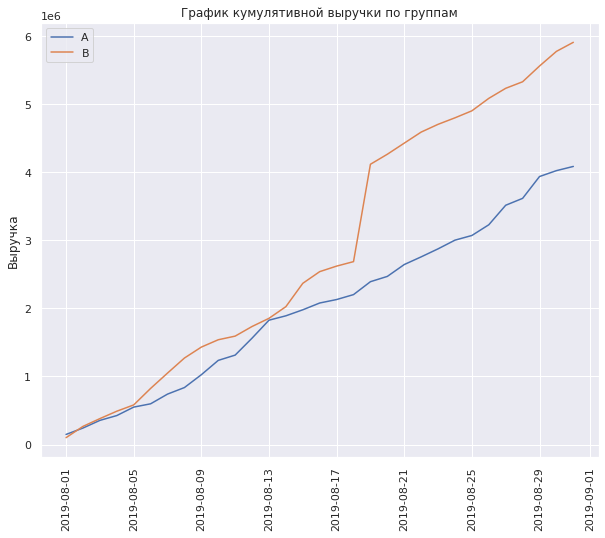

In [23]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA['date'], cummulativeA['revenue'], label='A')
plt.plot(cummulativeB['date'], cummulativeB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=90)

plt.legend()
plt.show()

Группа А показывает плавный рост, тогда как у группы B 18-19 августа заметен резкий скачек, похожий на выброс. Вероятно такой выброс связан с некоторомым количеством заказов, которое значительно больше среднего чека.

### Построение и анализ графикf кумулятивного среднего чека по группам. 

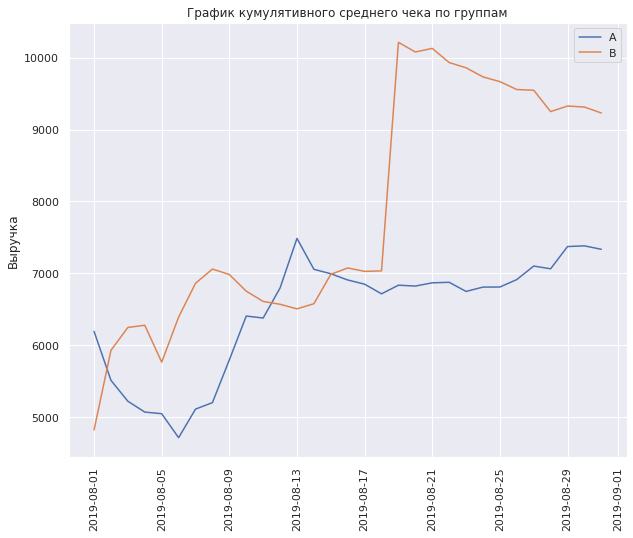

In [24]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.plot(cummulativeA['date'], cummulativeA['average_check'], label='A')
plt.plot(cummulativeB['date'], cummulativeB['average_check'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=90)
plt.legend()
plt.show()

Средний чек группы В, аналогично делает резкий скачек 18-19 августа, затем плавно понижается.

### Построение и анализ графикa относительного изменения кумулятивного среднего чека группы B к группе A.

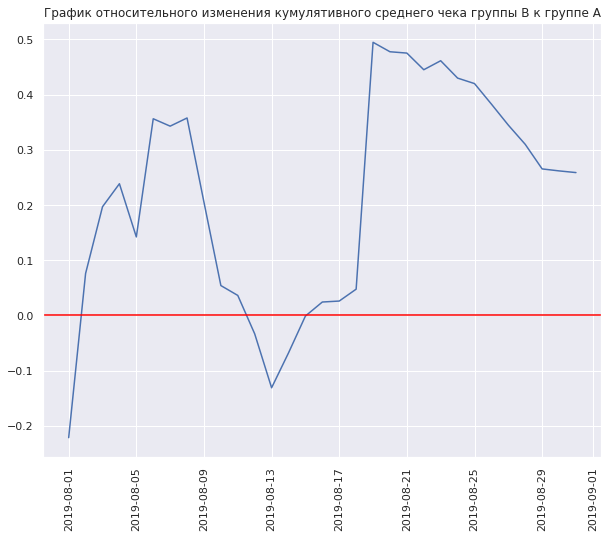

In [25]:
temp = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['average_check_B'] / temp['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=90)
plt.show()

На данном графике так же заметен резкий рост 18-19 августа.

### Построение и анализ графикa кумулятивного среднего количества заказов на посетителя по группам.

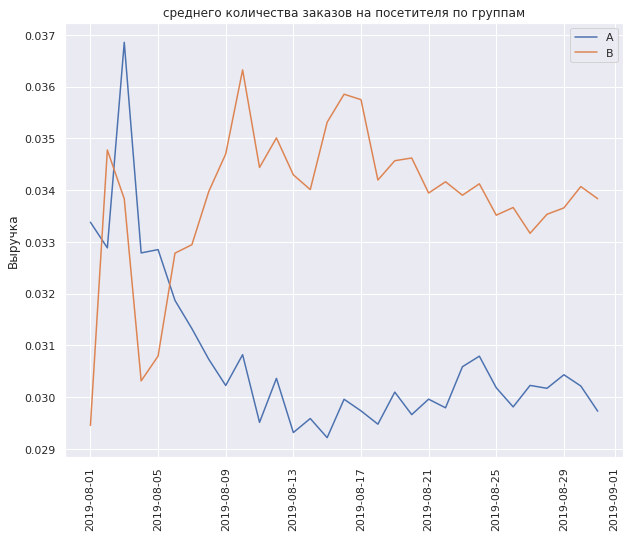

In [26]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA['date'], cummulativeA['conversion'], label='A')
plt.plot(cummulativeB['date'], cummulativeB['conversion'], label='B')
plt.title('среднего количества заказов на посетителя по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=90)
plt.legend()
plt.show()

Среднее количество заказов группы В выгледет немного лучше, в районе 0,033-0,036 против 0,029 - 0,031 у группы А.

### Построение и анализ графикa относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

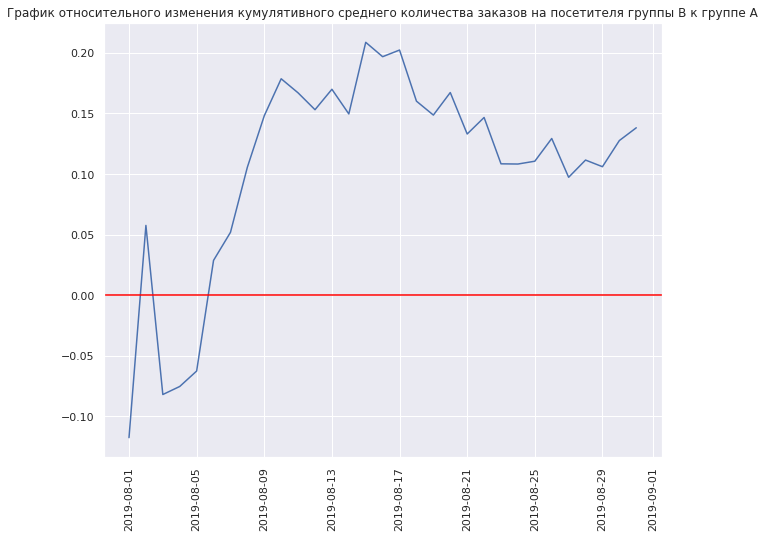

In [27]:
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=90)
plt.show()

Среднее количество заказов на посетителя группы В значительно больше.

### Построение и анализ графикa точечного графика количества заказов по пользователям.

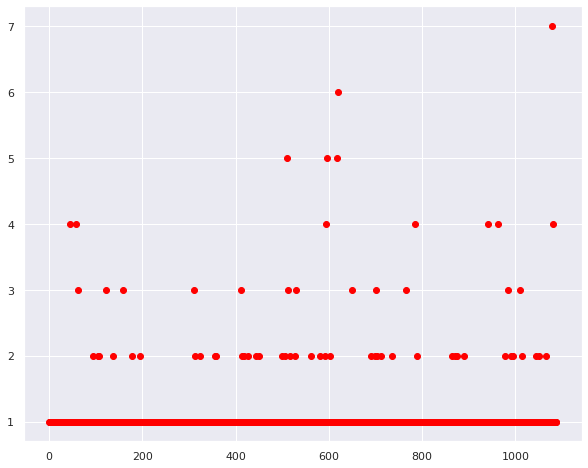

In [28]:
orders_per_user = orders.groupby(['visitorid', 'group'], as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'], color='red')
plt.show()


Ожидаемо большая часть покупателей совершает 1 покупку, но есть и шопоголики.

### Расчет 95-й и 99-й перцентили количества заказов на пользователя и определение границ для  аномальных пользователей.

In [29]:
print('90 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 2.00
99 перцентиль: 4.00


Полезователей совершающих больше 4-х покупок можно считать аномальными.

### Построение и анализ графикa стоимостей заказов. 

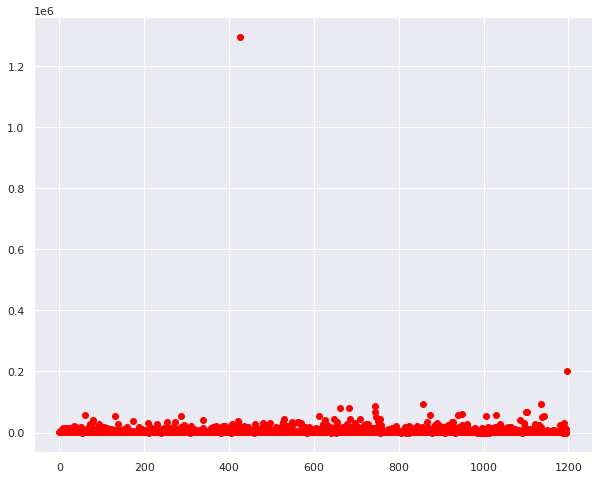

In [30]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='red')
plt.show()

По графику заметны 2 больших выброса, вероятно они и вызвали скачки на графиках.

### Расчет 95-й и 99-й перцентили стоимости заказови и определение границ для аномальныхзаказов.

In [31]:
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 18168.00
95 перцентиль: 28000.00
99 перцентиль: 58233.20


Заказы дороже 58233.20 можно считать аномальными

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [32]:
ordersA = orders.query('group == "A"').reset_index(drop=True)
ordersB = orders.query('group == "B"').reset_index(drop=True)
ordersByUsersA = orders_per_user.query('group == "A"').reset_index(drop=True)
ordersByUsersB = orders_per_user.query('group == "B"').reset_index(drop=True)
cumulativeDataA = cummulative.query('group == "A"').reset_index(drop=True)
cumulativeDataB = cummulative.query('group == "B"').reset_index(drop=True)

In [33]:
# По критерию Манна-Уитни
# H0:Cтатистически значимых различий в среднем количестве заказов между группами нет 
# H1:Cтатистически значимые различия в среднем количестве заказов между группами есть
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

alpha = 0.05
results = st.mannwhitneyu(sampleA, sampleB)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".')

print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-значение: 0.017
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".
Относительный прирост конверсии группы B: 0.138


В ходе анализа «сырых данных» выявлено, что в конверсии между группами есть статистически значимые различия. Относительный прирост количества заказов группы B к группе A равен 13.8%.

### Расчет  статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. 

In [34]:
# По критерию Манна-Уитни
# H0: Cтатистически значимых различий в среднем чеке между группами нет
# H1: Cтатистически значимst различиz в среднем чеке между группами есть
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'less')
pvalue = results.pvalue
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')

p-значение: 0.365
Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".


In [35]:
print('Средний чек группы А = ', orders[orders['group']=='A']['revenue'].mean())
print('Средний чек группы В = ', orders[orders['group']=='B']['revenue'].mean())
print('Относительный прирост в среднем чеке группы B = {0:.3f}' .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Средний чек группы А =  7333.578096947936
Средний чек группы В =  9230.875
Относительный прирост в среднем чеке группы B = 0.259


Cтатистически значимых отличий в среднем чеке между группами не выявленны. Однако, относительное различие среднего чека между группами по «сырым» данным целых 26%. Вероятно сказываются аномально дорогие заказы.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [36]:
# По критерию Манна-Уитни
# H0: Конверсия в группе A и В равны 
# H1: Конверсия в группе A и В НЕ равны

usersWithManyOrders = orders_per_user[orders_per_user['orders'] > 4]['visitorid']
usersWithExpensiveOrders = orders[orders['revenue'] > 58234]['visitorid']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
                 .drop_duplicates()
                 .reset_index(drop=True))
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(cumulativeDataA['visitors'].sum() - len(ordersByUsersA['orders'])),
               name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(cumulativeDataB['visitors'].sum() - len(ordersByUsersB['orders'])),
               name='orders')],axis=0)

alpha = 0.05
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".')

print("Относительный прирост конверсии группы B: {0:.3f}"
      .format(sampleBFiltered.mean()/sampleAFiltered.mean() - 1))



p-значение: 0.013
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".
Относительный прирост конверсии группы B: 0.159


Как и в случае с сырыми данными, статистическая значимость достигнута. Относительный прирост количества заказовов на поситителя  группы B к группе A по «очищенным» данным равен 15.9%.

### Расчет статистической значимости различий  среднем чеке заказа между группами по «очищенным» данным. 

In [37]:
orders_clear = orders.query('revenue <= 58233')
# По критерию Манна-Уитни
# H0: Cтатистически значимых различий в среднем чеке между группами нет
# H1: Cтатистически значимst различиz в среднем чеке между группами есть
alpha = 0.05
results = st.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'], True, 'less')
print('p-значение: {:.3f}'.format(results.pvalue))
if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".')
    
print('Средний чек группы А = ', orders_clear[orders_clear['group']=='A']['revenue'].mean())
print('Средний чек группы В = ', orders_clear[orders_clear['group']=='B']['revenue'].mean())
print('Относительный прирост в среднем чеке группы B = {0:.3f}' .format(orders_clear[orders_clear['group']=='B']['revenue'].mean()/orders_clear[orders_clear['group']=='A']['revenue'].mean()-1))

p-значение: 0.310
Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".
Средний чек группы А =  6470.587272727273
Средний чек группы В =  6592.692913385827
Относительный прирост в среднем чеке группы B = 0.019


Статистическая значимость достигнута не была. Но разница между группами сократилась с 26% до менее чем 2%.

### Общий вывод.

Тест можно остановить и считать успешно пройденным.

Проведен анализ данных о посетителях и заказах интернет-магазина. Произведена предобработка: преоразование типов и переименование столбцов. Пропуски и дубликаты не обнаружены. 

Произведен A/B тест. В ходе анализа результатов теста, определены аномальнные пользователи, которые совершили или слишком много или слишком дорогие покупки (но таких пользователей менее 1%).


Далее произведено сравнение количества заказов на пользователя и средний чек в двух группах. 

Непараметрический тест Уилкоксона-Манна-Уитни показал:

* есть статистически значимое различие по количеству заказов между группами как по сырым данным, так и после фильтрации аномалий; 
* по сырым данным и по очищенным нет статистически значимого различия по среднему чеку между группами.

В свою очередь графики кумулятивного среднего чека и кумулятивного среднего количества заказов показывают устойчивую тенденцию, что позволяет сделать вывод, что результаты не изменятся в будущем. 

В этой связи тест можно завершить и зафиксировать победу группы B. Количество среднее количество заказов у группы B на 15,9%, а средний чек на 2%.